In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# initialize the map and image size
n = 10
# map is the environment setting where the agent will walk in, with the size of a square n*n
# image is used to visualize the map, different color denotes different rewards, they can be positive or negative

map = np.zeros((n, n))
image = np.zeros((n, n, 3))
l = list(range(n * n))

In [8]:
# define a function to set a reward value for the whole map
# use gaussian noise to simulate the reward,
# which is quite natural because fewer location will have extreme positive or negative values
def generate_reward(n, seed=0, mean=0, sigma=10):
    # set the random seed to ensure the experiment is repeatable
    np.random.seed(seed)
    return np.random.normal(loc=mean, scale=sigma, size=(n, n))


map += generate_reward(n, seed=0, mean=0, sigma=30)
reward_max = map.max()
reward_min = map.min()

# the starting point is (0,0), and the terminal point is (5,9)
map[0][0] = 0
map[5][9] = 10000
print(map)

[[ 0.00000000e+00  1.20047163e+01  2.93621395e+01  6.72267960e+01
   5.60267397e+01 -2.93183364e+01  2.85026525e+01 -4.54071625e+00
  -3.09656555e+00  1.23179551e+01]
 [ 4.32130713e+00  4.36282052e+01  2.28311318e+01  3.65025049e+00
   1.33158970e+01  1.00102298e+01  4.48223722e+01 -6.15474791e+00
   9.39203105e+00 -2.56228722e+01]
 [-7.65896945e+01  1.96085579e+01  2.59330860e+01 -2.22649506e+01
   6.80926387e+01 -4.36309702e+01  1.37275552e+00 -5.61551550e+00
   4.59833764e+01  4.40807631e+01]
 [ 4.64842277e+00  1.13448756e+01 -2.66335724e+01 -5.94238940e+01
  -1.04373645e+01  4.69046907e+00  3.69087204e+01  3.60713955e+01
  -1.16198045e+01 -9.06908252e+00]
 [-3.14565890e+01 -4.26005381e+01 -5.11881057e+01  5.85232619e+01
  -1.52895655e+01 -1.31422290e+01 -3.75838608e+01  2.33247107e+01
  -4.84169354e+01 -6.38220841e+00]
 [-2.68639968e+01  1.16070749e+01 -1.53241541e+01 -3.54189655e+01
  -8.45466850e-01  1.28499561e+01  1.99551667e+00  9.07415693e+00
  -1.90296628e+01  1.00000000e+04

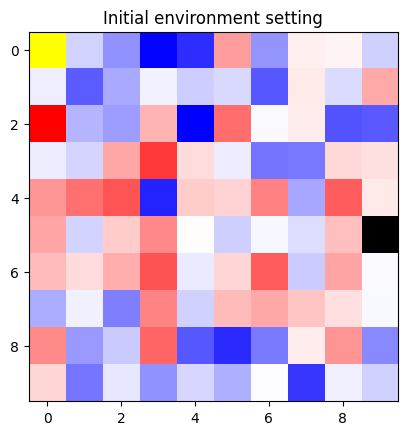

In [9]:
# visualize the map
# blue color denotes positive reward, the darker the blue color is, the larger the reward is
# red color denotes negative reward, the darker the red color is, the smaller the reward is

for i in range(100):
    # get the x and y coordinate of the node
    x = i // 10
    y = i % 10
    # set the color of the initial node as yellow
    if (x == 0 and y == 0):
        image[x][y][0] = 1
        image[x][y][1] = 1
        image[x][y][2] = 0
    # set the color of the terminal node as black
    elif (x == 5 and y == 9):
        image[x][y][0] = 0
        image[x][y][1] = 0
        image[x][y][2] = 0
    # set the color of the nodes with positive reward
    elif map[x][y] > 0:
        image[x][y][0] = 1 - map[x][y] / reward_max
        image[x][y][1] = 1 - map[x][y] / reward_max
        image[x][y][2] = 1
    # set the color of nodes with negative reward
    elif map[x][y] < 0:
        image[x][y][0] = 1
        image[x][y][1] = 1 - map[x][y] / reward_min
        image[x][y][2] = 1 - map[x][y] / reward_min

# visualize the initial environment
plt.imshow(image)
plt.title("Initial environment setting")
plt.show()

In [10]:
# define a function to compute the reward corresponding to a route
# the route is given
def compute_reward(route, gamma=0.95):
    t = 0
    reward_sum = 0
    # (i,j) is the coordinate in the map
    # the corresponding value restored in the map is in map[j][i]
    # for example, the node (5,0) is stored as the first row of the map, and the fifth value of the map
    for i, j in route:
        if map[i][j] > 0:
            map_val = map[i][j] * gamma ** t
        else:
            map_val = map[i][j]
        t += 1
        # print(map_val)
        reward_sum += map_val
    return reward_sum

In [11]:
# define a function to draw the route, given all the nodes to pass by
def draw_route(img, node_li, title=None):
    x_li = []
    y_li = []
    for x, y in node_li:
        x_li.append(x)
        y_li.append(y)
    x_coor = np.array(x_li)
    y_coor = np.array(y_li)

    plt.imshow(img)
    plt.plot(y_coor, x_coor, color="r")
    plt.title(title)
    plt.show()

5111.799903829434


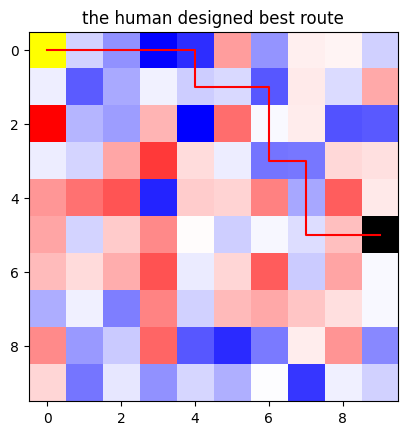

In [12]:
# give the best route designed and initialize it
# best_route = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1),
#               (6, 1), (6, 2), (6, 3), (7, 3), (7, 4), (7, 5), (8, 5), (9, 5)]
best_route = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5),
              (1, 6), (2, 6), (3, 6), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9)]
# get the reward of the route
print(compute_reward(best_route, gamma=0.95))
# visualize the route
draw_route(image, best_route, "the human designed best route")

In [13]:
# check whether a node is in the map, n is the length of map
def in_range_map(n, x, y):
    if (0 <= x <= n - 1 and 0 <= y <= n - 1):
        return True
    else:
        return False

# define a function to get the next state, given current state and the action
def get_next_state(current_state, action):
    new_state = tuple(sum(x) for x in zip(current_state, action))
    return new_state

In [14]:
# simulate the Q learning algorithm to train a route and evaluate it
# n is the size of the map, gamma is the discount factor, alpha is the learning rate
# epsilon is the percentage of time when the agent will choose the action with largest Q value,
# episode_num is the total time of episodes
# t_init is a parameter to control the training time
def Q_learning_train(n, gamma=0.95, alpha=0.1, epsilon=0.9, episode_num=1000, t_terminal=100):
    # initialize the action list
    action_alternative = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # initialize the Q value table
    Q_table = np.zeros((n, n, len(action_alternative)))
    for episode in range(episode_num):
        # print(episode)
        # initialize the state, we always start from (0,0)
        x = random.randint(0, 9)
        y = random.randint(0, 9)
        # in each single episode
        t = 0
        while not (x == 5 and y == 9) and t <= t_terminal:
            t += 1
            # identify the current state
            state = (x, y)
            # select the action
            # with the probability of epsilon to select the best action with highest Q value
            # with the probability of 1-epsilon to select a random action
            rand_num = np.random.random()

            if rand_num < epsilon:
                # print(x, y)
                action_id = np.argmax(Q_table[x, y])
                action = action_alternative[action_id]
                # print(action,"arg")
            else:
                action = random.choice(action_alternative)
                # print(action,"rand")
            # invalid action
            new_x, new_y = get_next_state(state, action)
            if not in_range_map(n, new_x, new_y):
                continue
            # valid action, update the Q table
            else:
                # evaluate the action
                new_state = get_next_state(state, action)
                prev_x, prev_y = x, y
                x, y = new_state
                previous_Q_val = Q_table[prev_x][prev_y][action_alternative.index(action)]
                # compute the reward
                reward = map[x][y]
                # compute temporal difference for that action
                temporal_difference = reward + gamma * np.max(Q_table[x][y]) - previous_Q_val
                # learn from this temporal difference according to its learning rate alpha
                new_Q_val = previous_Q_val + alpha * temporal_difference
                # update the Q table for the previous state and action
                Q_table[prev_x][prev_y][action_alternative.index(action)] = new_Q_val
    return Q_table

In [15]:
# the potential action can be go up/down/left/right one step each time
action_alternative = [(-1, 0), (1, 0), (0, -1), (0, 1)]
def get_route(Q_table, x=0, y=0, t_terminal=100):
    route = []
    # action_alternative = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # initialize the starting point, we always start from 5,9

    route.append((x, y))
    t = 0
    while not (x == 5 and y == 9) and t <= t_terminal:
        t += 1
        # find out the best action according to the Q_table
        action = action_alternative[np.argmax(Q_table[x][y])]
        x, y = get_next_state((x, y), action)
        # print(x, y)
        route.append((x, y))
    return route


# define a function to visualize and evaluate a route
def evaluate_route(image, route, title):
    terminal_x, terminal_y = route[-1]
    draw_route(image, route, title)
    reward_route = compute_reward(route)
    if (terminal_x == 5 and terminal_y == 9):
        status = True
    else:
        status = False
    return (reward_route, status)

In [16]:
def find_stuck_point(route):
    result = []
    count_dict = {}
    for node in route:
        count_dict[node] = count_dict.get(node, 0) + 1
    for key, val in count_dict.items():
        if val >= 3:
            result.append(key)
    # if there is no stuck point, return None
    if len(result) == 0:
        result = None
    # determine the stuck node order
    else:
        temp = []
        for node in result:
            order_in_route = route.index(node)
            temp.append((order_in_route, node))
        temp = sorted(temp)
        result = [i[1] for i in temp]
    return result

In [17]:
# apply human feedback to enhance the training performance
# give a better route which is similar to the trained route
def route_after_human_feedback(n, Q_table, trained_route):
    modified_route = []
    # find the stuck point
    stuck_point_li = find_stuck_point(trained_route)
    terminal_node_training = stuck_point_li[-1]
    # get the first part of route
    partial_route_1 = []
    for node in trained_route:
        partial_route_1.append(node)
        if node == terminal_node_training:
            break

    # apply human feedback here
    # e.g when the agent was stuck between (0,3) and (0,4)
    # I keep all of its trained route before that and keep (0,3), (0,4) only once,
    # and point out that you should go down once, and go right twice
    # then the initial state for it to be trained will be at (1,6)
    print(f"Now the agent is stuck between several nodes. Its terminal node now is {terminal_node_training}."
          "Please give feedback to help it out.")
    guide_route = []
    curr_state = terminal_node_training
    while True:
        human_action = input("Please enter one action(0: go up one step, 1: go down one step, "
                             "2: go left one step, 3: go right one step):")
        if human_action == "quit":
            break
        elif human_action in ["0", "1", "2", "3"]:
            action_choice = int(human_action)
            action = action_alternative[action_choice]
            if not in_range_map(n, *get_next_state(curr_state, action)):
                print("The action leads to the agent going out of the border! Please enter again")
                continue
            curr_state = get_next_state(curr_state, action)
            guide_route.append(curr_state)
            print(f"The agent transmits to state{curr_state} with the guidance.")
        else:
            print("Invalid input! Please enter again")
            continue
    print(f"Finally, with the guidance of human feedback, the agent transmits to state{curr_state}.")
    # then train the agent to go to the destination based on the new initial point
    new_x, new_y = curr_state
    trained_route_after_human_feedback = get_route(Q_table, new_x, new_y)
    print(trained_route_after_human_feedback)
    # Note: even with the help of human feedback, the agent is also likely to fail between nodes

    # finally, the modified route is composed of partial training route, guide route, and another trained route
    modified_route.extend(partial_route_1)
    modified_route.extend(guide_route)
    modified_route.extend(trained_route_after_human_feedback)
    print(modified_route)
    return modified_route

In [18]:
# define a function to iterate the training result, and test the training performance
# feedback_mode: whether human feedback is involved
def iterate_training(n, repeat_time=10, feedback_mode=False):
    # train to get the Q table, use default arguments
    # repeat 10 times to check the probability of success
    success_time = 0
    total_reward = 0
    route_li = []
    if not feedback_mode:
        title_partial = "route without human feedback"
        for i in range(repeat_time):
            obtained_Q_table = Q_learning_train(n, episode_num=1000)
            # print(obtained_Q_table)
            # utilize the trained Q table to get the route
            obtained_route = get_route(obtained_Q_table)
            # print(obtained_route)
            reward, status = evaluate_route(image, obtained_route, title_partial + f" in trial {i}")
            print(f"reward of the trial {i} without human feedback: {reward}")
            success_time += status
            total_reward += reward
            route_li.append(obtained_route)
    else:
        title_partial = "route with human feedback"
        # get the integrated route with training and human feedback
        for i in range(repeat_time):
            obtained_Q_table = Q_learning_train(n)
            trained_route = get_route(obtained_Q_table)
            route_with_human_feedback = route_after_human_feedback(n, obtained_Q_table, trained_route)
            reward, status = evaluate_route(image, route_with_human_feedback, title_partial + f" in trial {i}")
            success_time += status
            total_reward += reward
            route_li.append(route_with_human_feedback)
            print(f"reward of the trial {i} with human feedback: {reward}")
    # summarize the success probability and average reward without human feedback
    success_rate = success_time / repeat_time
    average_reward = total_reward / repeat_time

    return (success_rate, average_reward, route_li)

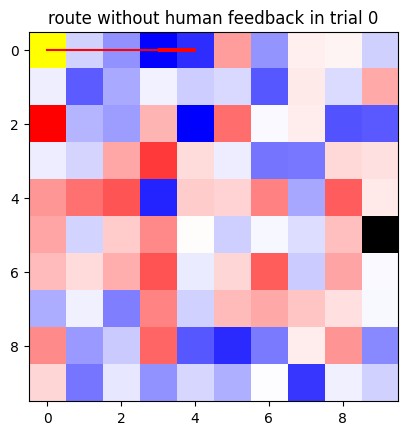

reward of the trial 0 without human feedback: 1090.5405966829323


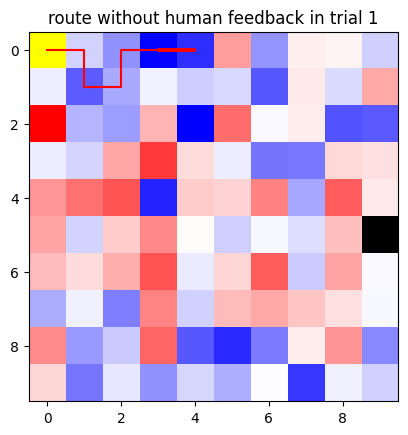

reward of the trial 1 without human feedback: 1043.6335048508274


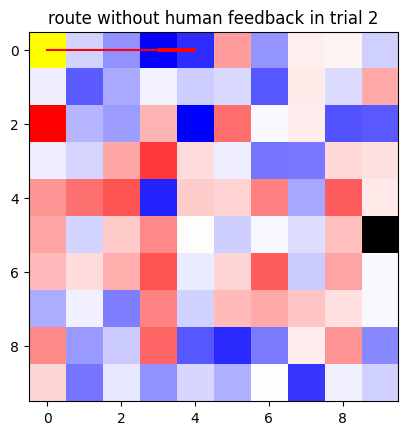

reward of the trial 2 without human feedback: 1090.5405966829323


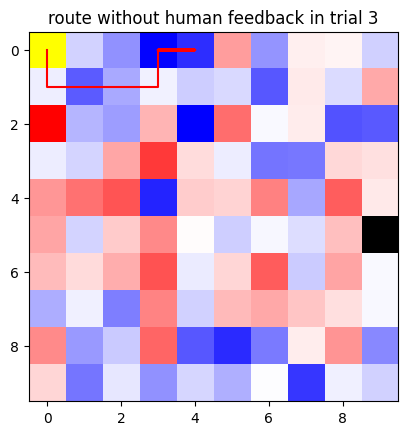

reward of the trial 3 without human feedback: 1015.3917718775193


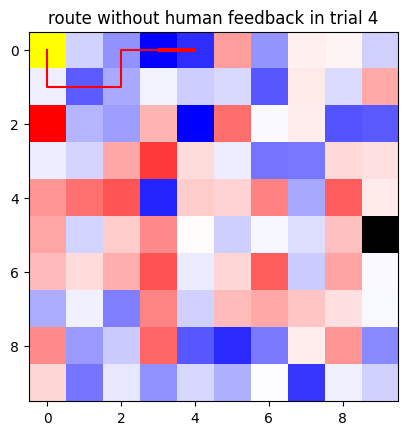

reward of the trial 4 without human feedback: 1036.3342661904464


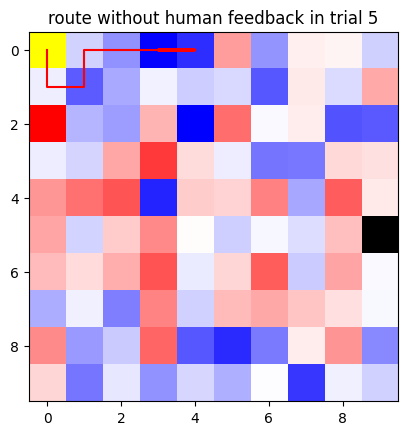

reward of the trial 5 without human feedback: 1027.051968198225


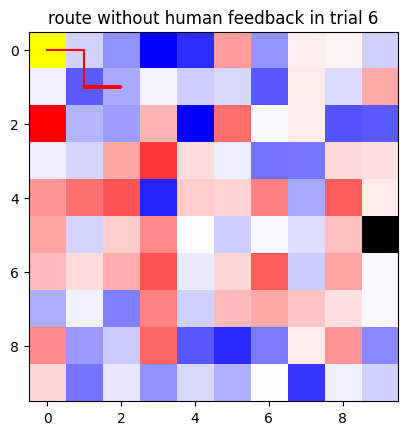

reward of the trial 6 without human feedback: 612.4330522825935


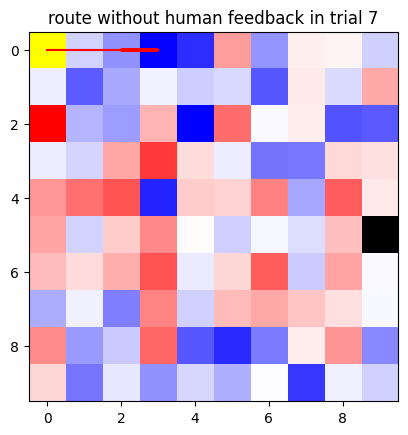

reward of the trial 7 without human feedback: 869.2482157597472


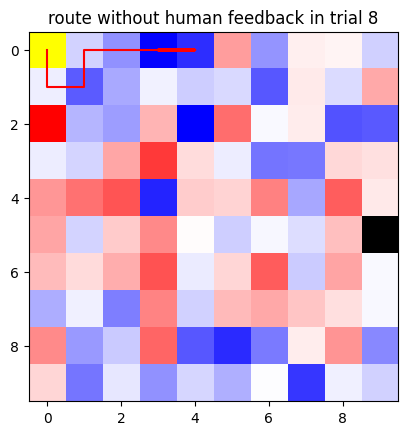

reward of the trial 8 without human feedback: 1027.051968198225


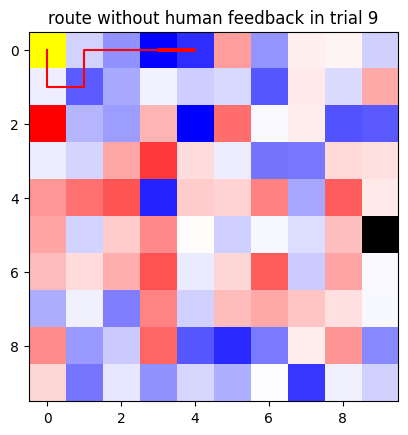

reward of the trial 9 without human feedback: 1027.051968198225
When there is no human feedback involved, the success rate is 0.0
and average reward is 983.9277908921674.


In [19]:
# success probability and average reward without human feedback
success_rate_without_human_feedback, average_reward_without_human_feedback, route_li = iterate_training(n, 10, False)
print(f"When there is no human feedback involved, the success rate is {success_rate_without_human_feedback}\n"
      f"and average reward is {average_reward_without_human_feedback}.")
# From the output of the route list, we can easily find out that the agent is often stuck between (0,3) and (0,4)
# without human feedback, it usually fails, because the agent will be limited to the high reward if it simply keeps walking
# between (0,3), and (0,4)
# It is hard to overcome that and explores the much larger reward on (5,9), because (5,9) is far away from (0,3)
# (This is due to the limitation of common RL)
# Consequently, the average reward is much less than the ideal case, which is not desirable
# print(route_li)

In [20]:
# apply human feedback and check the performance afterwards
# success probability and average reward with human feedback
success_rate_with_feedback, average_reward_with_feedback, route_li = iterate_training(n, 1, True)
print(f"When there is human feedback involved, the success rate is {success_rate_with_feedback}"
      f" and average reward is {average_reward_with_feedback}.")

Now the agent is stuck between several nodes. Its terminal node now is (0, 4).Please give feedback to help it out.


# conclusion: the final performance of the agent is seriously affected by the quality of the guidance
With the low quality of guidance, the agent is very likely to stuck between two nodes and fail again.
In small proportion of time, the agent can manage to go to the destination without the help of human feedback.
This is because of the randomness of Q learning training.
Essentially, the quality of the trained Q table determines the final performance.